In [25]:
# imports and seeds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats


### Problem 1

In [26]:
# Problem 1a

genetic_components_gen1 = []
environmental_components_gen1 = []

for i in range(1000):
    genetic = np.random.normal(loc = 0.0, scale = np.sqrt(.3)) # Va = .3, SD = sqrt(Va)
    environmental = np.random.normal(loc = 0.0, scale = np.sqrt(.7)) # Ve = .7
    genetic_components_gen1.append(genetic)
    environmental_components_gen1.append(environmental)

Text(0, 0.5, 'Frequency')

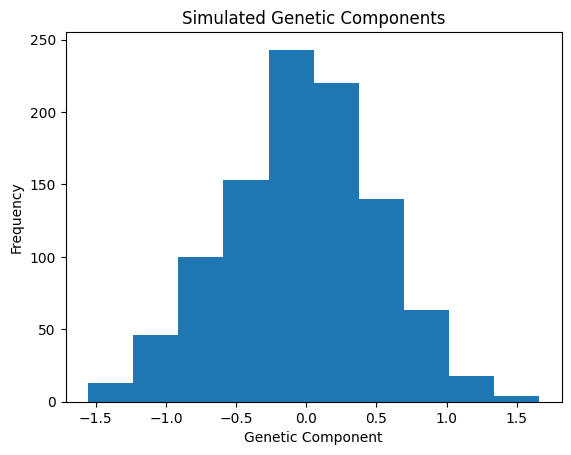

In [27]:
plt.hist(genetic_components_gen1)
plt.title('Simulated Genetic Components')
plt.xlabel('Genetic Component')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

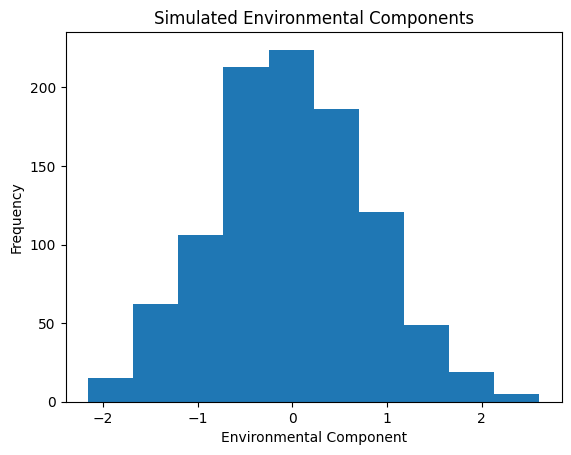

In [28]:
plt.hist(environmental_components_gen1)
plt.title('Simulated Environmental Components')
plt.xlabel('Environmental Component')
plt.ylabel('Frequency')

In [29]:
# Problem 1b

genetic_components_gen2 = []
parent_1_gen2 = []
parent_2_gen2 = []

for offspring in range(0, 1000):
    # choose two parents randomly without replacement
    parent_1, parent_2 = np.random.choice(range(0, 1000), size = 2, replace = False)
    mean = (genetic_components_gen1[parent_1] + genetic_components_gen1[parent_2])*0.5 # midparent genotype
    
    parent_1_gen2.append(parent_1)
    parent_2_gen2.append(parent_2)

    genetic = np.random.normal(loc = mean, scale = np.sqrt(.3/2)) # Go|Gm, Gp ~ N(midparent genotype, Va/2)
    genetic_components_gen2.append(genetic)

Text(0, 0.5, 'Frequency')

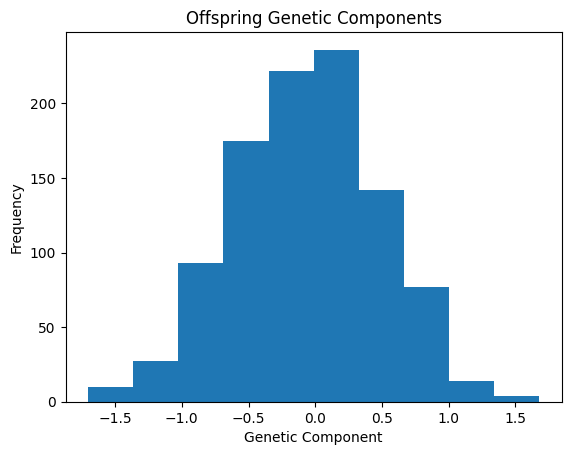

In [30]:
plt.hist(genetic_components_gen2)
plt.title('Offspring Genetic Components')
plt.xlabel('Genetic Component')
plt.ylabel('Frequency')

### Problem 2

In [31]:
# Problem 2a

midparent_phenotypes = []
offspring_phenotypes = []

for offspring in range(0, 1000):
    # get information about offspring's parents (randomly generated in 1b)
    parent_1_genetic = genetic_components_gen1[parent_1_gen2[offspring]]
    parent_1_environment = environmental_components_gen1[parent_1_gen2[offspring]]
    parent_2_genetic = genetic_components_gen1[parent_2_gen2[offspring]]
    parent_2_environment = environmental_components_gen1[parent_2_gen2[offspring]]

    # Pm = Gm + Em, same for Pp
    parent_1_phenotype = parent_1_genetic + parent_1_environment
    parent_2_phenotype = parent_2_genetic + parent_2_environment

    midparent_phenotype = np.mean([parent_1_phenotype, parent_2_phenotype]) # Pmp = 0.5(Pm + Pp)
    midparent_phenotypes.append(midparent_phenotype)

    # Po|Pm, Pp ~ N(h2*midparent phenotype, Va(1-0.5h2) + Ve)
    mean = 0.3*midparent_phenotype
    variance = .3*(1 - 0.5*0.3) + .7
    offspring_phenotype = np.random.normal(loc = mean, scale = np.sqrt(variance))
    offspring_phenotypes.append(offspring_phenotype)


Text(0, 0.5, 'Offspring Phenotype Values')

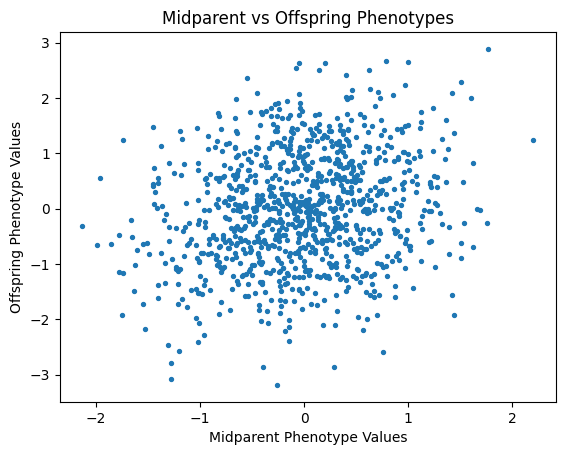

In [32]:
plt.scatter(midparent_phenotypes, offspring_phenotypes, s=8)
plt.title('Midparent vs Offspring Phenotypes')
plt.xlabel('Midparent Phenotype Values')
plt.ylabel('Offspring Phenotype Values')

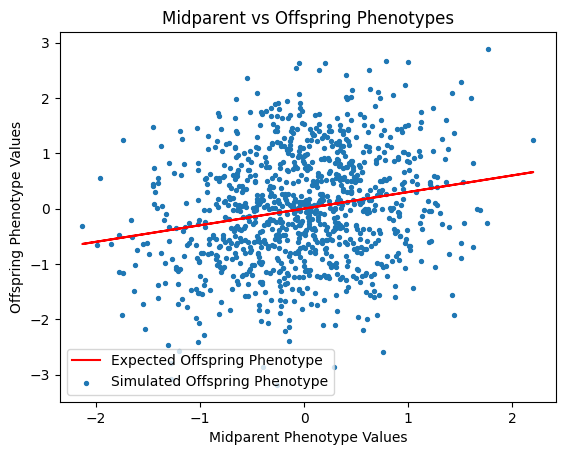

In [33]:
# Problem 2b

# exp Po = h2 * Pmp
exp_offspring_phenotypes = 0.3*np.array(midparent_phenotypes)

plt.plot(midparent_phenotypes, exp_offspring_phenotypes, c = 'red', linestyle = '-', label = 'Expected Offspring Phenotype')
plt.scatter(midparent_phenotypes, offspring_phenotypes, s=8, label = 'Simulated Offspring Phenotype')
plt.title('Midparent vs Offspring Phenotypes')
plt.xlabel('Midparent Phenotype Values')
plt.ylabel('Offspring Phenotype Values')
plt.legend(loc = 'lower left')

Text(-2, 2.5, 'Heritability: 0.308')

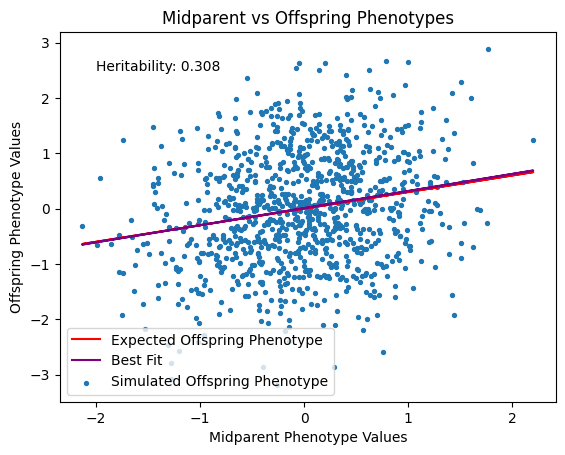

In [34]:
# Problem 2c

# find best fit line
coefficients = np.polyfit(midparent_phenotypes, offspring_phenotypes, 1)
slope = coefficients[0]
intercept = coefficients[1]
best_fit = slope * np.array(midparent_phenotypes) + intercept

plt.plot(midparent_phenotypes, exp_offspring_phenotypes, c = 'red', label = 'Expected Offspring Phenotype')
plt.plot(midparent_phenotypes, best_fit, c = 'purple', label = 'Best Fit')
plt.scatter(midparent_phenotypes, offspring_phenotypes, s=8, label = 'Simulated Offspring Phenotype')
plt.title('Midparent vs Offspring Phenotypes')
plt.xlabel('Midparent Phenotype Values')
plt.ylabel('Offspring Phenotype Values')
plt.legend(loc = 'lower left')
plt.text(-2, 2.5, 'Heritability: ' + str(slope)[0:5])

In [35]:
# Problem 2d

midparent_phenotypes_all = {}
offspring_phenotypes_all = {}
exp_offspring_phenotypes = {}
slopes = {}
best_fits = {}

for h2 in [0, 0.3, 0.5, 0.9]:
    offspring_phenotypes_h2 = []
    midparent_phenotypes_h2 = []

    for offspring in range(0, 1000):
        parent_1_genetic = genetic_components_gen1[parent_1_gen2[offspring]]
        parent_1_environment = environmental_components_gen1[parent_1_gen2[offspring]]
        parent_2_genetic = genetic_components_gen1[parent_2_gen2[offspring]]
        parent_2_environment = environmental_components_gen1[parent_2_gen2[offspring]]

        parent_1_phenotype = parent_1_genetic + parent_1_environment
        parent_2_phenotype = parent_2_genetic + parent_2_environment

        midparent_phenotype = np.mean([parent_1_phenotype, parent_2_phenotype])
        midparent_phenotypes_h2.append(midparent_phenotype)

        mean = h2*midparent_phenotype
        variance = 1*(1 - 0.5*h2*h2)
        offspring_phenotype = np.random.normal(loc = mean, scale = np.sqrt(variance))
        offspring_phenotypes_h2.append(offspring_phenotype)
    
    exp_offspring_phenotypes_h2 = h2*np.array(midparent_phenotypes_h2)

    coefficients = np.polyfit(midparent_phenotypes_h2, offspring_phenotypes_h2, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    best_fit = slope * np.array(midparent_phenotypes_h2) + intercept

    midparent_phenotypes_all[h2] = midparent_phenotypes_h2
    offspring_phenotypes_all[h2] = offspring_phenotypes_h2
    exp_offspring_phenotypes[h2] = exp_offspring_phenotypes_h2
    slopes[h2] = slope
    best_fits[h2] = best_fit


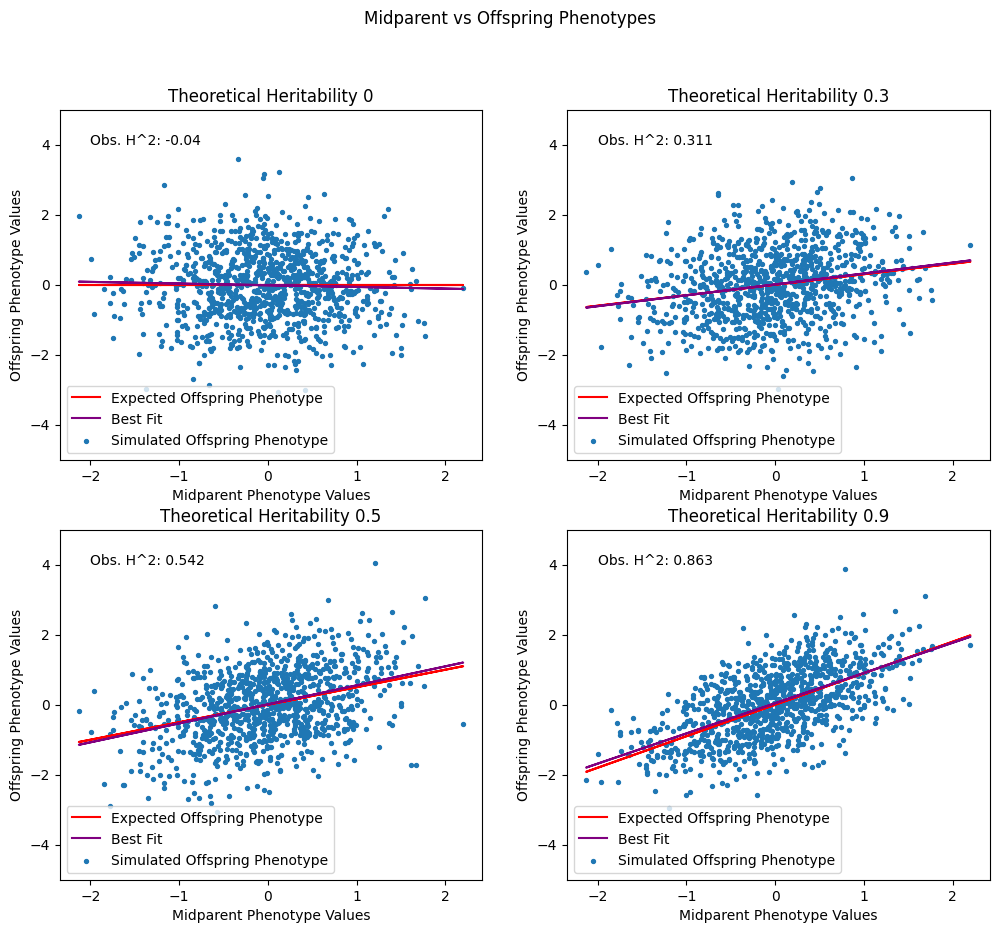

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Midparent vs Offspring Phenotypes')

axis_map = {0: (0, 0), 0.3: (0, 1), 0.5: (1, 0), 0.9: (1, 1)}

for h2 in [0, 0.3, 0.5, 0.9]:
    axes[axis_map[h2]].plot(midparent_phenotypes_all[h2], exp_offspring_phenotypes[h2], c = 'red', label = 'Expected Offspring Phenotype')
    axes[axis_map[h2]].plot(midparent_phenotypes_all[h2], best_fits[h2], c = 'purple', label = 'Best Fit')
    axes[axis_map[h2]].scatter(midparent_phenotypes_all[h2], offspring_phenotypes_all[h2], s=8, label = 'Simulated Offspring Phenotype')
    axes[axis_map[h2]].set_ylim(-5, 5)
    axes[axis_map[h2]].set_title('Theoretical Heritability ' + str(h2))
    axes[axis_map[h2]].set_xlabel('Midparent Phenotype Values')
    axes[axis_map[h2]].set_ylabel('Offspring Phenotype Values')
    axes[axis_map[h2]].legend(loc = 'lower left')
    axes[axis_map[h2]].text(-2, 4, 'Obs. H^2: ' + str(slopes[h2])[0:5])


### Problem 3

In [37]:
# Problem 3a

def one_simulation_all_h2(h2_list):

    # define Va, Ve, Vp = 1
    va = 1*h2
    ve = 1 - 1*h2

    # simulate generation 1 (1000 individuals)
    genetic_components_gen1 = []
    environmental_components_gen1 = []
    for i in range(1000):
        genetic = np.random.normal(loc = 0.0, scale = np.sqrt(va))
        environmental = np.random.normal(loc = 0.0, scale = np.sqrt(ve))
        genetic_components_gen1.append(genetic)
        environmental_components_gen1.append(environmental)
    
    # simulate generation 2 (1000 individuals)
    # genetic_components_gen2 = []
    parent_1_gen2 = []
    parent_2_gen2 = []
    for offspring in range(0, 1000):
        parent_1, parent_2 = np.random.choice(range(0, 1000), size = 2, replace = False)
        parent_1_gen2.append(parent_1)
        parent_2_gen2.append(parent_2)
    
    # run one simulation for every h2

    sims_obs_h2 = {0: [], 0.3: [], 0.5: [], 0.9: []}

    for true_h2 in h2_list:
        offspring_phenotypes_h2 = []
        midparent_phenotypes_h2 = []

        for offspring in range(0, 1000):
            parent_1_genetic = genetic_components_gen1[parent_1_gen2[offspring]]
            parent_1_environment = environmental_components_gen1[parent_1_gen2[offspring]]
            parent_2_genetic = genetic_components_gen1[parent_2_gen2[offspring]]
            parent_2_environment = environmental_components_gen1[parent_2_gen2[offspring]]
            parent_1_phenotype = parent_1_genetic + parent_1_environment
            parent_2_phenotype = parent_2_genetic + parent_2_environment

            midparent_phenotype = np.mean([parent_1_phenotype, parent_2_phenotype])
            midparent_phenotypes_h2.append(midparent_phenotype)

            mean = true_h2*midparent_phenotype
            variance = 1*(1 - 0.5*true_h2*true_h2)
            offspring_phenotype = np.random.normal(loc = mean, scale = np.sqrt(variance))
            offspring_phenotypes_h2.append(offspring_phenotype)

        coefficients = np.polyfit(midparent_phenotypes_h2, offspring_phenotypes_h2, 1)
        slope = coefficients[0]

        sims_obs_h2[true_h2].append(slope)
    
    return sims_obs_h2


def add_dicts(*dicts):
    result = {}
    for d in dicts:
        for key, value in d.items():
            if key not in result:
                result[key] = value  # If key doesn't exist, create a new list
            else:
                result[key].extend(value)  # If key exists, extend the list
    return result

In [115]:
one_hundred_sims_per_h2 = {}
for sim in range(100):
    one_sim = one_simulation_all_h2([0, 0.3, 0.5, 0.9])
    one_hundred_sims_per_h2 = add_dicts(one_hundred_sims_per_h2, one_sim)

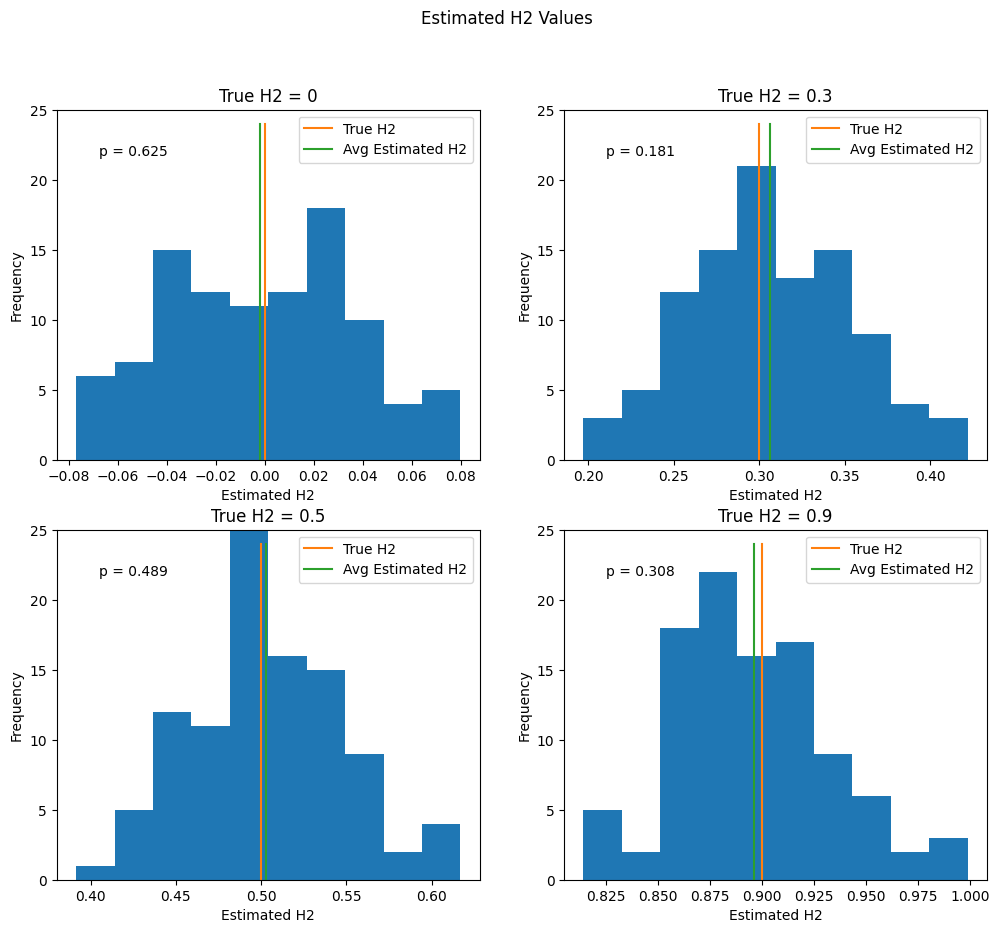

In [116]:
# Problem 3b

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Estimated H2 Values')
axis_map = {0: (0, 0), 0.3: (0, 1), 0.5: (1, 0), 0.9: (1, 1)}

for h2 in [0, 0.3, 0.5, 0.9]:
    axes[axis_map[h2]].hist(one_hundred_sims_per_h2[h2])
    axes[axis_map[h2]].set_ylim(0, 25)
    axes[axis_map[h2]].set_title('True H2 = ' + str(h2))
    axes[axis_map[h2]].set_xlabel('Estimated H2')
    axes[axis_map[h2]].set_ylabel('Frequency')
    axes[axis_map[h2]].plot([h2]*25, range(25), label = 'True H2')
    axes[axis_map[h2]].plot([np.mean(one_hundred_sims_per_h2[h2])]*25, range(25), label = 'Avg Estimated H2')
    axes[axis_map[h2]].legend(loc = 'upper right')

    # Problem 3c
    t_stat, p_value = stats.ttest_1samp(one_hundred_sims_per_h2[h2], h2)
    axes[axis_map[h2]].text(0.1, 0.9, 'p = ' + str(p_value)[0:5], transform=axes[axis_map[h2]].transAxes, horizontalalignment='left', verticalalignment='top')


##### I wanted to run a larger number of simulations for each true H2 and see how many p values fell below 0.05 to see if it was truly unbiased. Found out that the simulations take too long to run to do that, but with some code optimization could be interesting.

### Problem 4

In [ ]:
# Problem 4a

# w = 1 + Bp
def w_from_p(phenotype_list, beta):
    return 1 + np.array(phenotype_list)*beta

# gen 1 fitness (example)
phenotype_gen_1 = np.array(genetic_components_gen1) + np.array(environmental_components_gen1)
fitness_gen_1 = w_from_p(phenotype_gen_1, 0.1)


In [ ]:
# Problem 4b

1q

def first_generation(h2):
    # vp = 1
    va = 1*h2
    ve = 1 - 1*h2

    # simulate generation 1 (1000 individuals)
    genetic_components_gen1 = []
    environmental_components_gen1 = []
    for i in range(1000):
        genetic = np.random.normal(loc = 0.0, scale = np.sqrt(va))
        environmental = np.random.normal(loc = 0.0, scale = np.sqrt(ve))
        genetic_components_gen1.append(genetic)
        environmental_components_gen1.append(environmental)
    phenotype_gen1 = np.array(genetic_components_gen1) + np.array(environmental_components_gen1)

    return genetic_components_gen1, environmental_components_gen1, phenotype_gen1

def increase_generation(gen1_genetic_components, gen1_phenotype, beta, h2):
    gen1_fitness = w_from_p(gen1_phenotype, beta)
    va = 1*h2
    ve = 1 - h2
    
    gen2_genetic_components = []
    gen2_environmental_components = []
    gen2_obs_phenotypes = []
    for i in range(1000):
        # select parents based on fitness
        parent_1_genetic = np.random.choice(gen1_genetic_components, p=squish(gen1_fitness))
        parent_2_genetic = np.random.choice(gen1_genetic_components, p=squish(gen1_fitness))

        # calculate phenotype of offspring through genetic transmission from parent 1 and parent 2 + E = P
        # Gmt|Gm ~ N(Gm/2, Va/4)
        parent_1_genetic_transmission = np.random.normal(loc = parent_1_genetic/2, scale = np.sqrt(va/4))
        parent_2_genetic_transmission = np.random.normal(loc = parent_2_genetic/2, scale = np.sqrt(va/4))

        genetic = parent_1_genetic_transmission + parent_2_genetic_transmission
        gen2_genetic_components.append(genetic)
        environmental = np.random.normal(loc = 0.0, scale = np.sqrt(ve))
        gen2_environmental_components.append(environmental)

        obs_gen2_phenotype = genetic + environmental
        gen2_obs_phenotypes.append(obs_gen2_phenotype)

    return np.mean(gen2_obs_phenotypes), gen2_genetic_components, gen2_obs_phenotypes


# Problem 4c
def get_expected_phenotypes(h2, beta, first_generation_phenotypes, number_generations):
    # Pt = P0 + tVaB
    va = 1*h2
    expected_phenotypes = []
    first_generation_mean_phenotype = np.mean(first_generation_phenotypes)
    for t in range(number_generations):
        exp_phenotype = first_generation_mean_phenotype + t*va*beta
        expected_phenotypes.append(exp_phenotype)
    return expected_phenotypes



In [ ]:

h2_list = [0.2, 0.5, 0.8]
mean_phenotype_generations = {0.2: [], 0.5: [], 0.8: []}
exp_phenotype_generations = {0.2: [], 0.5: [], 0.8: []}
beta = 0.1

for h2 in h2_list:
    genetic_components, environmental_components, phenotypes = first_generation(h2)
    first_generation_phenotypes = phenotypes # save for clarity
    mean_phenotype_generations[h2].append(np.mean(first_generation_phenotypes))

    for i in range(19):
        mean_obs_phenotype, genetic_components, phenotypes = increase_generation(genetic_components, phenotypes, beta, h2)
        mean_phenotype_generations[h2].append(mean_obs_phenotype)
    
    exp_phenotype_generations[h2] = get_expected_phenotypes(h2, beta, first_generation_phenotypes, number_generations=20)


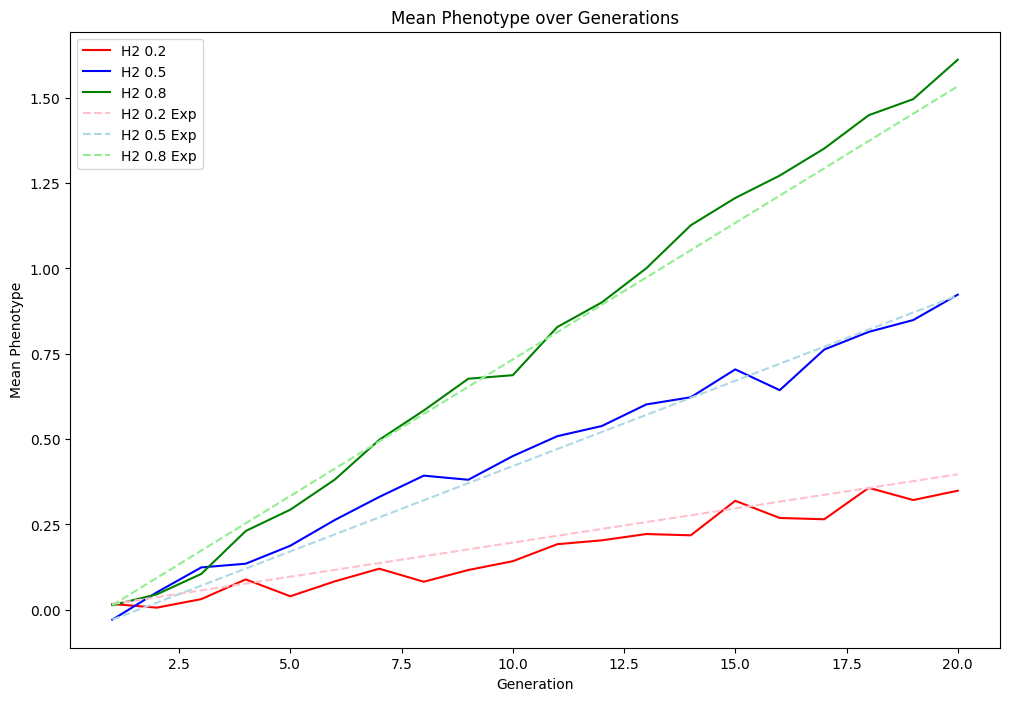

In [ ]:
generations = range(1, 21)

plt.figure(figsize = (12, 8))
plt.plot(generations, mean_phenotype_generations[0.2], label = 'H2 0.2', c = 'red')
plt.plot(generations, mean_phenotype_generations[0.5], label = 'H2 0.5', c = 'blue')
plt.plot(generations, mean_phenotype_generations[0.8], label = 'H2 0.8', c = 'green')

plt.plot(generations, exp_phenotype_generations[0.2], linestyle = '--', c = 'pink', label = 'H2 0.2 Exp')
plt.plot(generations, exp_phenotype_generations[0.5], linestyle = '--', c = 'lightblue', label = 'H2 0.5 Exp')
plt.plot(generations, exp_phenotype_generations[0.8], linestyle = '--', c = 'lightgreen', label = 'H2 0.8 Exp')

plt.xlabel('Generation')
plt.ylabel('Mean Phenotype')
plt.title('Mean Phenotype over Generations')
plt.legend()

In [117]:
# Problem 4d

beta_list = [0.04, 0.1, 0.16]
mean_phenotype_generations = {0.04: [], 0.1: [], 0.16: []}
exp_phenotype_generations = {0.04: [], 0.1: [], 0.16: []}
h2 = 0.5

# repeat and vary beta, fixed h2
for beta in beta_list:
    genetic_components, environmental_components, phenotypes = first_generation(h2)
    first_generation_phenotypes = phenotypes # save for clarity
    mean_phenotype_generations[beta].append(np.mean(first_generation_phenotypes))
    exp_phenotype_generations[beta].append(np.mean(first_generation_phenotypes))

    for i in range(19):
        mean_obs_phenotype, genetic_components, phenotypes = increase_generation(genetic_components, phenotypes, beta, h2)
        mean_phenotype_generations[beta].append(mean_obs_phenotype)

    exp_phenotype_generations[beta] = get_expected_phenotypes(h2, beta, first_generation_phenotypes, number_generations=20)
    

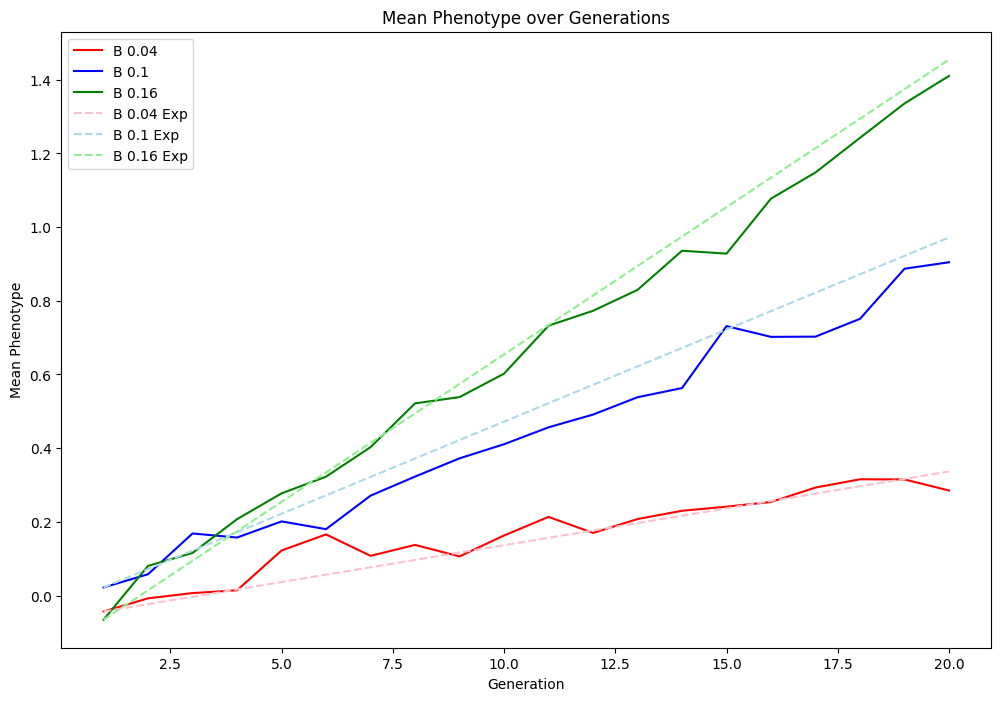

In [118]:
plt.figure(figsize = (12, 8))
plt.plot(generations, mean_phenotype_generations[0.04], label = 'B 0.04', c = 'red')
plt.plot(generations, mean_phenotype_generations[0.1], label = 'B 0.1', c = 'blue')
plt.plot(generations, mean_phenotype_generations[0.16], label = 'B 0.16', c = 'green')

plt.plot(generations, exp_phenotype_generations[0.04], linestyle = '--', c = 'pink', label = 'B 0.04 Exp')
plt.plot(generations, exp_phenotype_generations[0.1], linestyle = '--', c = 'lightblue', label = 'B 0.1 Exp')
plt.plot(generations, exp_phenotype_generations[0.16], linestyle = '--', c = 'lightgreen', label = 'B 0.16 Exp')

plt.xlabel('Generation')
plt.ylabel('Mean Phenotype')
plt.title('Mean Phenotype over Generations')
plt.legend()

# observed trajectory does not exactly follow expected because this is just one simulation per h2. Taking the average of more simulations
# would yield a better trajectory (however it takes a while).